In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
import seaborn as sns; sns.set()

import numpy as np
import math

In [56]:
def show_heatmaps(df, x, y, z, vmin=0.85, vmax=0.9):
    z_vals = df[z].unique()
    num_rows = math.ceil(len(z_vals) / 3.)

    f, axes = plt.subplots(num_rows, 3, figsize=(12,num_rows*4))
    plt.subplots_adjust(wspace=1.0, hspace=1.0)
    
    for i in range(num_rows):
        for j in range(3):
            z_val = z_vals[i*3+j]

            selection = df[df[z] == z_val]

            #print('{}: {}'.format(z, z_val))
            #print(selection[[x, y, 'val_score']].head())
            selection = selection.pivot(x, y, 'val_score')

            sns.heatmap(selection, vmin=vmin, vmax=vmax, ax=axes[i,j]).set_title('{}: {}'.format(z, z_val))

In [57]:
def linear(x):
    return x

In [58]:
def show_3d_heatmap(df, x, y, z, x_scale=linear, y_scale=linear, z_scale=linear):
    fig = plt.figure()

    ax = plt.axes(projection='3d')

    # Data for three-dimensional scattered points
    xs = x_scale(df[x].values)
    ys = y_scale(df[y].values)
    zs = z_scale(df[z].values)
    scores = df['val_score'].values
    scatterplot = ax.scatter3D(xs, ys, zs, c=scores, cmap='Reds')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)

    cbar = ax.figure.colorbar(scatterplot, ax=ax, cmap="Reds")
    cbar.ax.set_ylabel('Validation Score', rotation=-90, va="bottom")

## OPU Degree 2

In [59]:
opu_degree_2 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_sim_opu_2.csv')

In [60]:
opu_degree_2.sort_values(by='val_score', ascending=False)[:20]

,alpha,bias,degree,num_features,proj_time,projection,regr_time,scale,test_score,val_score
166,100.000000,4.0,2.0,10000.0,0.187822,opu,1.680780,0.10000,0.8779,0.891417
130,10.000000,4.0,2.0,10000.0,0.254174,opu,1.714385,0.10000,0.8792,0.891417
178,100.000000,16.0,2.0,10000.0,0.297519,opu,1.777415,0.10000,0.8783,0.890667
30,0.000001,16.0,2.0,10000.0,0.257331,opu,1.651374,0.00001,0.8783,0.890250
0,0.000001,0.0,2.0,10000.0,0.183987,opu,1.761728,0.00001,0.8772,0.888583
39,0.100000,0.0,2.0,10000.0,0.191521,opu,1.749461,0.01000,0.8769,0.888417
113,10.000000,0.0,2.0,10000.0,0.186789,opu,1.752485,1.00000,0.8810,0.888250
10,0.000001,1.0,2.0,10000.0,0.187370,opu,1.661005,0.10000,0.8785,0.888167
118,10.000000,1.0,2.0,10000.0,0.258918,opu,1.665361,0.10000,0.8772,0.888000
1,0.000001,0.0,2.0,10000.0,0.186250,opu,1.826622,0.00010,0.8822,0.887833


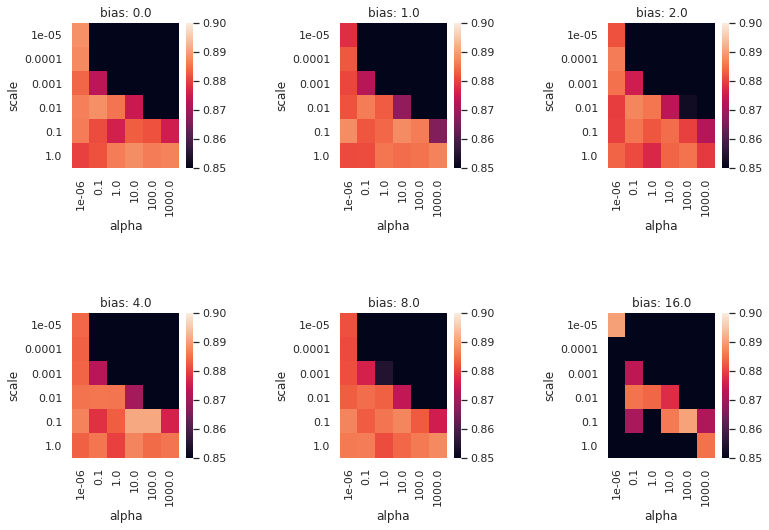

In [61]:
show_heatmaps(opu_degree_2, 'scale', 'alpha', 'bias', vmin=0.85, vmax=0.9)

## OPU Degree 4

In [62]:
opu_degree_4 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_sim_opu_4.csv')

In [63]:
opu_degree_4.sort_values(by='val_score', ascending=False)[:20]

,alpha,bias,degree,num_features,proj_time,projection,regr_time,scale,test_score,val_score
1,0.000001,0.0,4.0,10000.0,0.267275,opu,1.868906,1.000000e-08,0.8813,0.892500
202,1000.000000,16.0,4.0,10000.0,0.186714,opu,1.785812,1.000000e-02,0.8799,0.889583
93,1.000000,16.0,4.0,10000.0,0.181471,opu,1.667156,1.000000e-04,0.8812,0.889333
3,0.000001,0.0,4.0,10000.0,0.263226,opu,1.788322,1.000000e-04,0.8791,0.887500
13,0.000001,4.0,4.0,10000.0,0.186076,opu,1.768567,1.000000e-08,0.8787,0.886417
159,100.000000,4.0,4.0,10000.0,0.184082,opu,1.756757,1.000000e-04,0.8818,0.886417
23,0.000001,16.0,4.0,10000.0,0.247975,opu,1.682220,1.000000e+00,0.8795,0.886000
56,0.100000,16.0,4.0,10000.0,0.183897,opu,1.758750,1.000000e-06,0.8770,0.885667
75,1.000000,0.0,4.0,10000.0,0.251376,opu,1.770200,1.000000e-04,0.8781,0.885583
95,1.000000,16.0,4.0,10000.0,0.180066,opu,1.665614,1.000000e+00,0.8805,0.885333


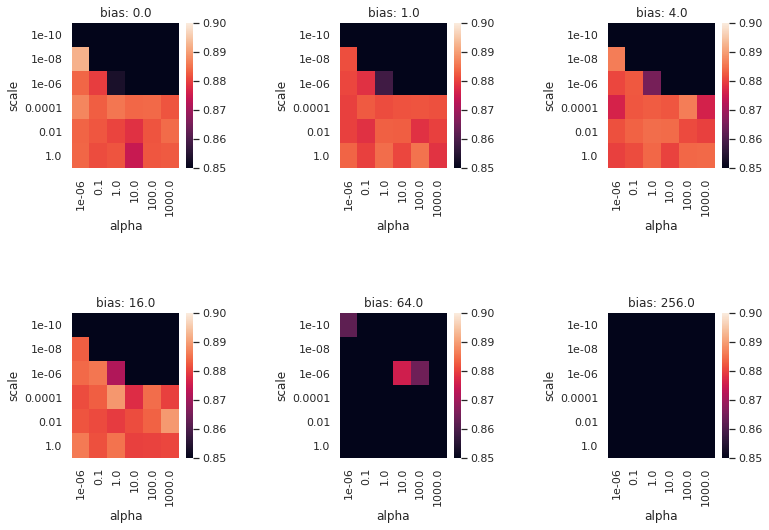

In [64]:
show_heatmaps(opu_degree_4, 'scale', 'alpha', 'bias', vmin=0.85, vmax=0.9)

## OPU Degree 6

In [65]:
opu_degree_6 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_sim_opu_6.csv')

In [66]:
opu_degree_6.sort_values(by='val_score', ascending=False)[:20]

,alpha,bias,degree,num_features,proj_time,projection,regr_time,scale,test_score,val_score
57,0.100000,64.0,6.0,10000.0,0.405988,opu,1.836699,1.000000e-06,0.8782,0.887083
167,100.000000,64.0,6.0,10000.0,0.182135,opu,1.760959,1.000000e+00,0.8799,0.886500
59,0.100000,64.0,6.0,10000.0,0.192652,opu,1.753371,1.000000e+00,0.8784,0.886083
166,100.000000,64.0,6.0,10000.0,0.254386,opu,1.775959,1.000000e-03,0.8782,0.885583
203,1000.000000,64.0,6.0,10000.0,0.187322,opu,1.759345,1.000000e+00,0.8807,0.885500
21,0.000001,64.0,6.0,10000.0,0.186185,opu,1.761906,1.000000e-06,0.8768,0.885167
131,10.000000,64.0,6.0,10000.0,0.187285,opu,1.858164,1.000000e+00,0.8802,0.885083
20,0.000001,64.0,6.0,10000.0,0.251577,opu,1.793651,1.000000e-09,0.8795,0.884917
95,1.000000,64.0,6.0,10000.0,0.184929,opu,1.753160,1.000000e+00,0.8778,0.884250
93,1.000000,64.0,6.0,10000.0,0.184528,opu,1.759632,1.000000e-06,0.8800,0.884000


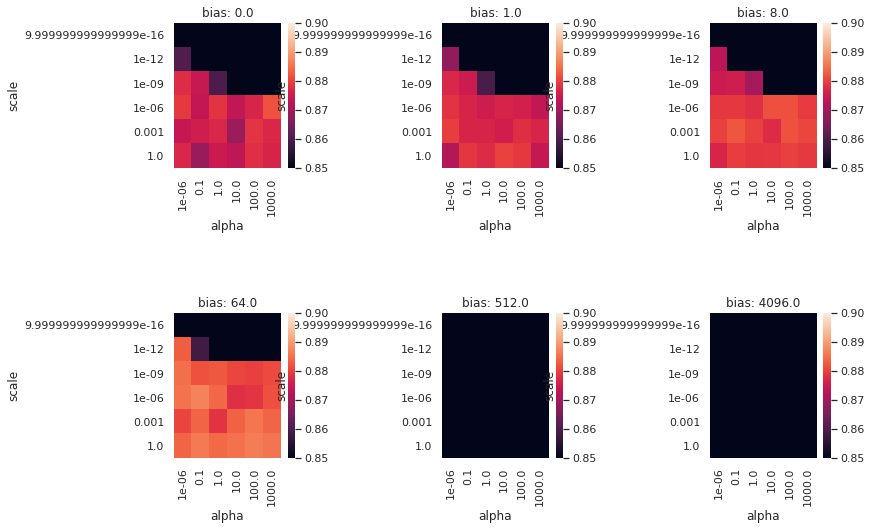

In [67]:
show_heatmaps(opu_degree_6, 'scale', 'alpha', 'bias', vmin=0.85, vmax=0.9)

## RBF

In [43]:
rbf = pd.read_csv('csv/FashionMNIST_rbf_rff.csv')

In [44]:
rbf.sort_values(by='val_score', ascending=False)[:20]

,alpha,gamma,num_features,proj_time,projection,regr_time,scale,test_score,val_score
25,0.000001,0.003906,10000.0,0.110230,rbf,1.829300,0.01,0.8859,0.894667
188,0.001000,0.003906,10000.0,0.101337,rbf,1.750485,0.10,0.8832,0.894167
358,1.000000,0.007812,10000.0,0.101937,rbf,1.790624,10.00,0.8843,0.893917
231,0.010000,0.000977,10000.0,0.101777,rbf,1.728432,1.00,0.8800,0.893667
303,0.100000,0.007812,10000.0,0.136939,rbf,1.824980,1.00,0.8858,0.892167
412,10.000000,0.007812,10000.0,0.102961,rbf,1.775341,10.00,0.8843,0.892083
76,0.000010,0.001953,10000.0,0.135893,rbf,1.819077,10.00,0.8825,0.891500
85,0.000010,0.007812,10000.0,0.112641,rbf,1.834133,0.01,0.8861,0.891167
191,0.001000,0.003906,10000.0,0.104754,rbf,1.797947,100.00,0.8822,0.891083
143,0.000100,0.007812,10000.0,0.100864,rbf,1.782040,100.00,0.8818,0.890917


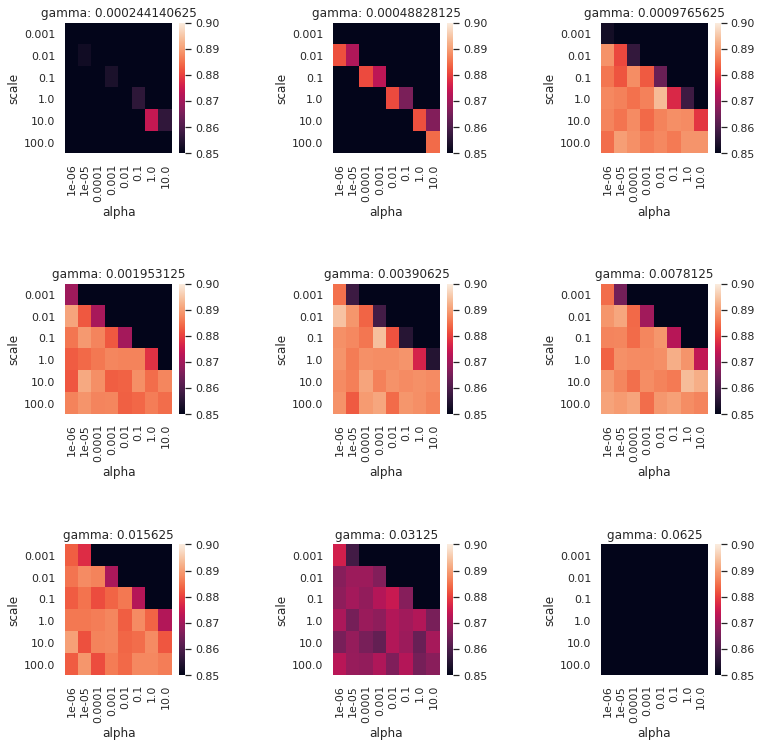

In [45]:
show_heatmaps(rbf, 'scale', 'alpha', 'gamma', vmin=0.85, vmax=0.9)